In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
df=pd.read_csv("Apple/AppleStore.csv")

In [3]:
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  lang.num          7197 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


<IPython.core.display.Javascript object>


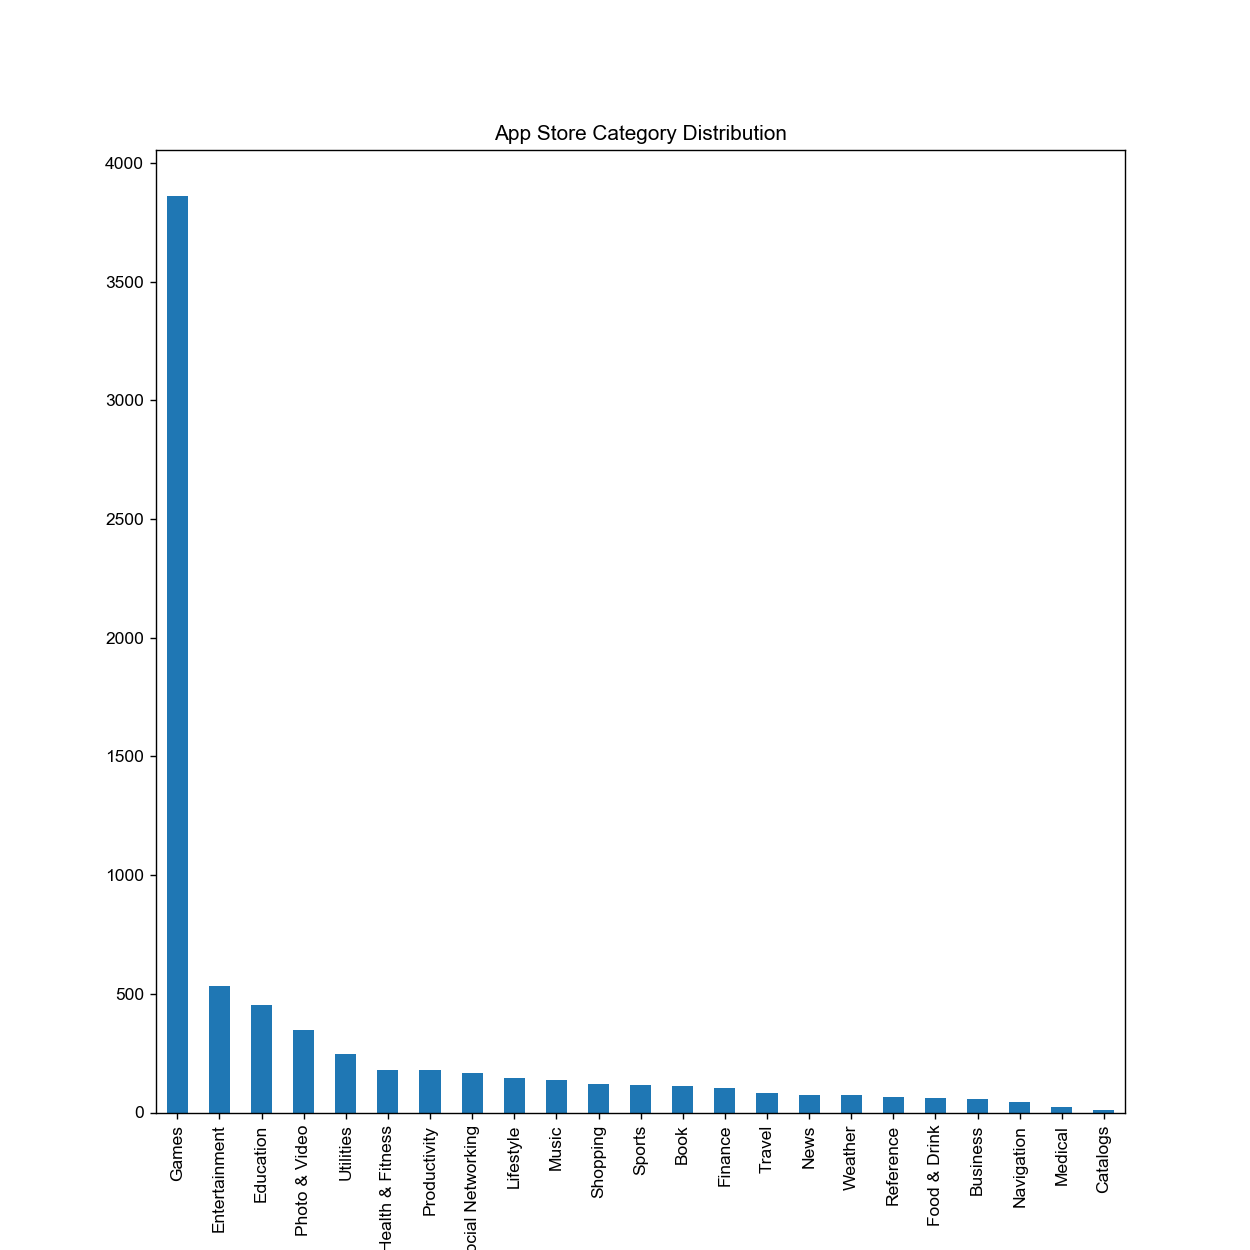

In [5]:
names=df.groupby('prime_genre')['prime_genre'].count().sort_values(ascending=False)
plt.figure()
names.plot.bar( figsize=(10, 10),fontsize=10)
plt.title('App Store Category Distribution')
plt.savefig('graphs/Category.png')


<IPython.core.display.Javascript object>


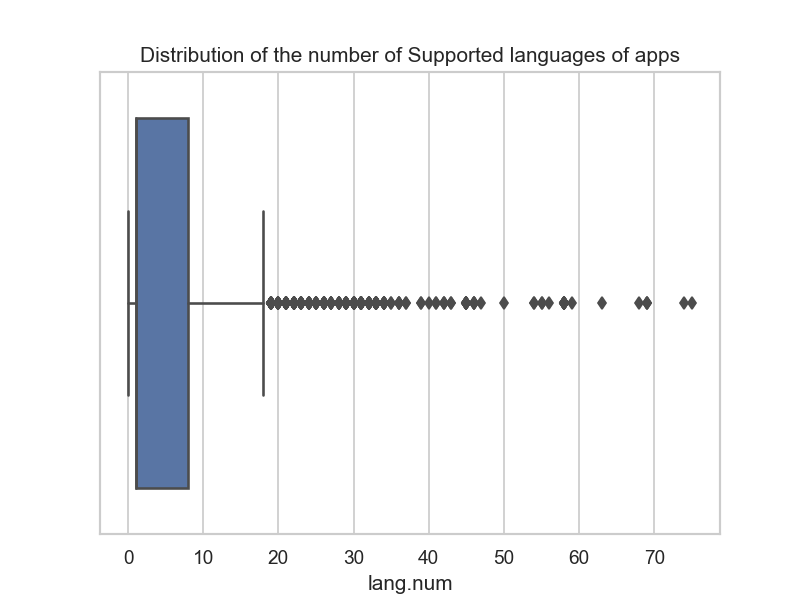

In [6]:
sns.set(style="whitegrid")
plt.figure()
ax = sns.boxplot(x=df["lang.num"]).set_title('Distribution of the number of Supported languages of apps')
plt.savefig('graphs/lang.num.png')
#####התפלגות שפות

<IPython.core.display.Javascript object>


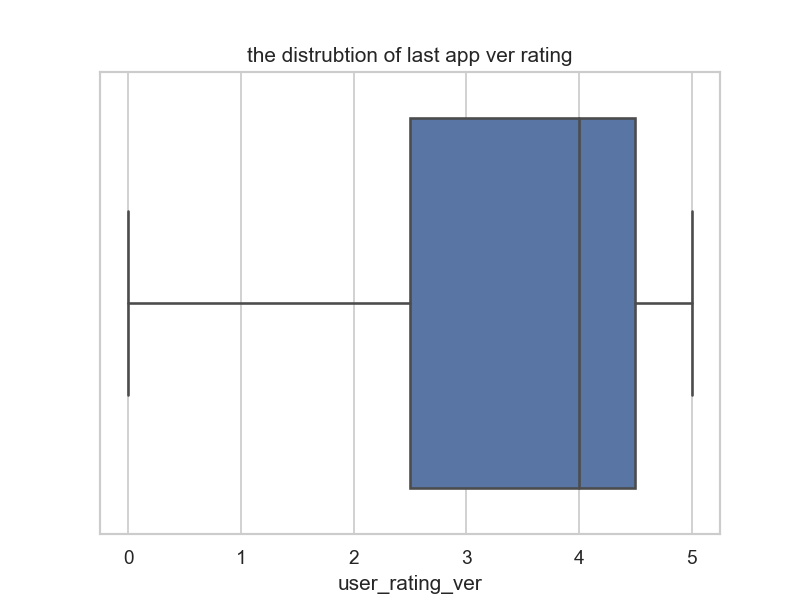

In [7]:
sns.set(style="whitegrid")
plt.figure()
ax = sns.boxplot(x=df["user_rating_ver"]).set_title('the distrubtion of last app ver rating')
plt.savefig('graphs/rating_of_last_app.png')


<IPython.core.display.Javascript object>


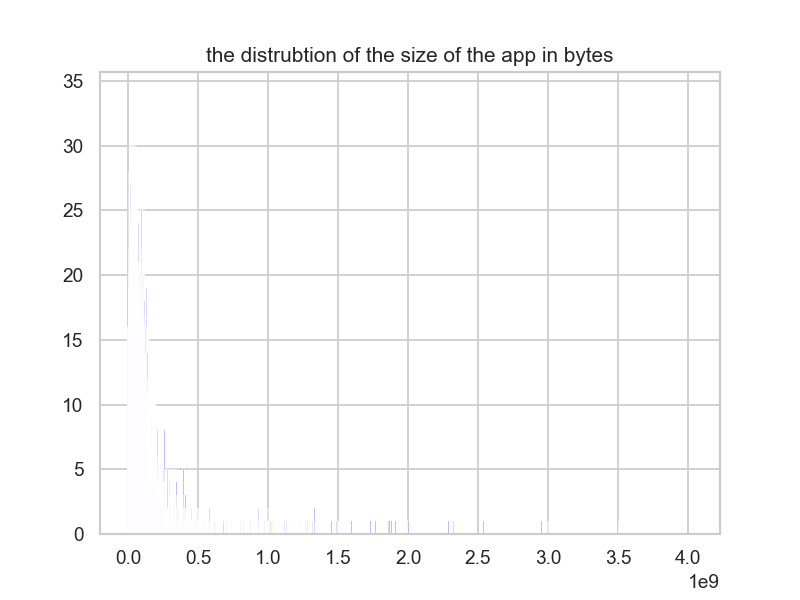

In [8]:
x = df["size_bytes"]
num_bins = len(df["size_bytes"])
plt.figure()
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('the distrubtion of the size of the app in bytes')
plt.show()
plt.savefig('graphs/size_bytes.png')

#####התפלגות גודל 

<IPython.core.display.Javascript object>


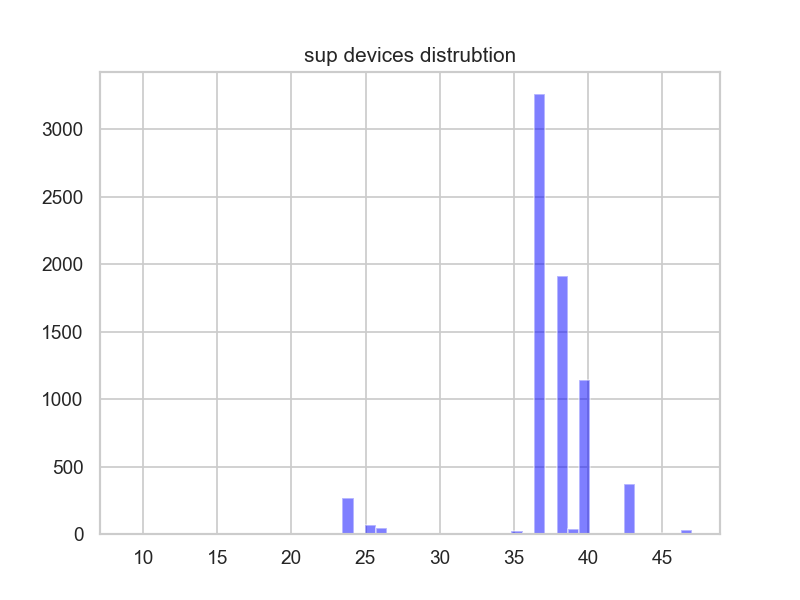

In [9]:
x = df["sup_devices.num"]
num_bins = 50
plt.figure()
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('sup devices distrubtion')
plt.savefig('graphs/sup_devices.num.png')
plt.show()

#####התפלגות המכשירים התומכים

<IPython.core.display.Javascript object>


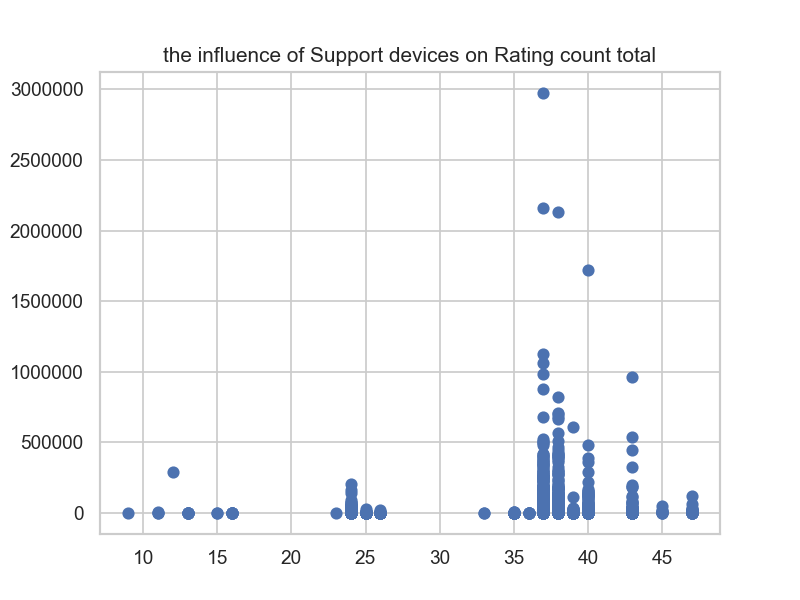

In [10]:
x = df["sup_devices.num"]
y = df["rating_count_tot"]
plt.figure()
plt.plot(x, y, "o")
plt.title('the influence of Support devices on Rating count total')
plt.savefig('graphs/sup_devices.num-rating-count.png')


<IPython.core.display.Javascript object>


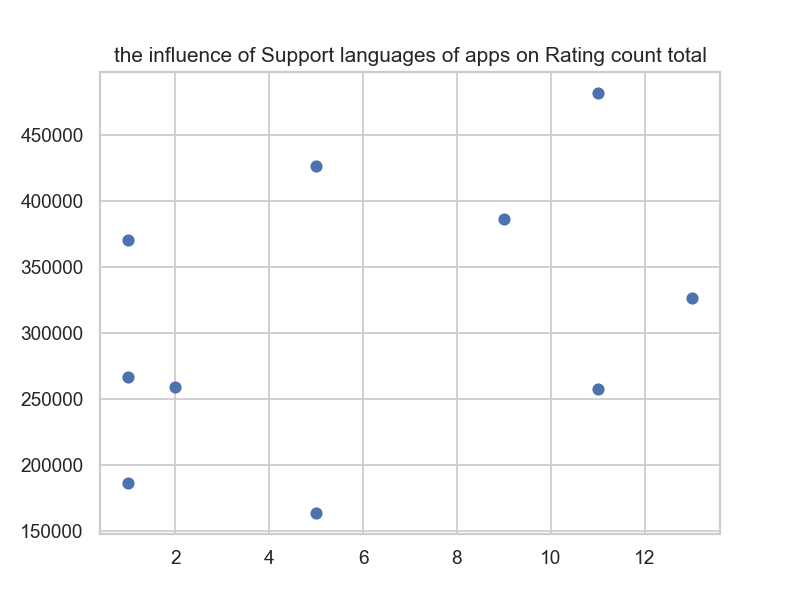

In [11]:
plt.figure()
top_20_rated = df.sort_values(['user_rating','rating_count_tot'],ascending=[False, False]).head(10).drop('Unnamed: 0',axis = 1)
x = top_20_rated['lang.num']
y = top_20_rated['rating_count_tot']
plt.scatter(x, y)
plt.title('the influence of Support languages of apps on Rating count total')
plt.show()
plt.savefig('graphs/lang.num-rating-count.png')


<IPython.core.display.Javascript object>


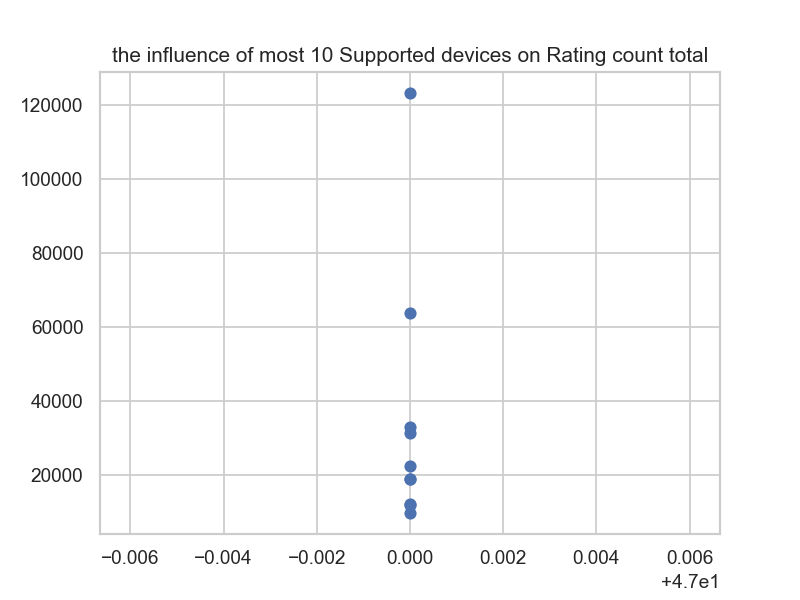

In [12]:
plt.figure()
top_99_rated = df.sort_values(['sup_devices.num','rating_count_tot'],ascending=[False, False]).head(10).drop('Unnamed: 0',axis = 1)
x = top_99_rated['sup_devices.num']
y = top_99_rated['rating_count_tot']
plt.scatter(x, y)
plt.title('the influence of most 10 Supported devices on Rating count total')
plt.savefig('graphs/sup_devices.num-rating_count_tot.png')
plt.show()


<IPython.core.display.Javascript object>


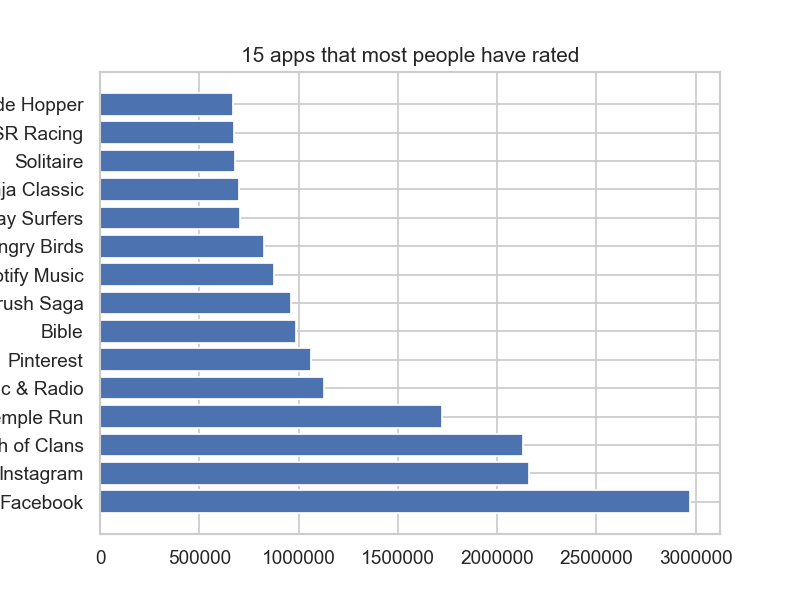

In [13]:
plt.figure()
top_15_rated = df.sort_values(['rating_count_tot'],ascending=[False]).head(15).drop('Unnamed: 0',axis = 1)
x = top_15_rated['track_name']
y = top_15_rated['rating_count_tot']
plt.barh(x, y)
plt.title('15 apps that most people have rated')
plt.savefig('graphs/15APPMOSTRATED.png')
plt.show()


<IPython.core.display.Javascript object>


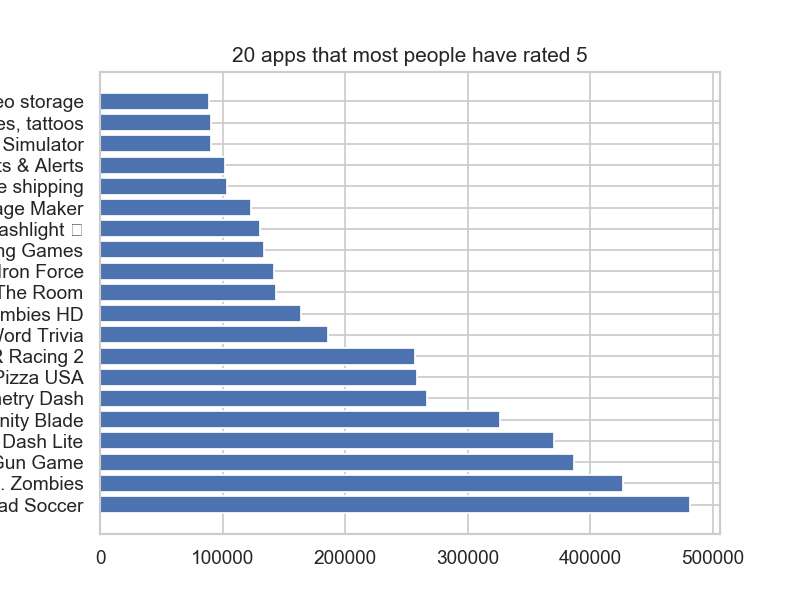

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


In [14]:
plt.figure()
top_20_rated = df.sort_values(['user_rating','rating_count_tot'],ascending=[False, False]).head(20).drop('Unnamed: 0',axis = 1)
x = top_20_rated['track_name']
y = top_20_rated['rating_count_tot']
plt.barh(x, y)
plt.title('20 apps that most people have rated 5')
plt.savefig('graphs/20APPMOSTRATED.png')
plt.show()



<IPython.core.display.Javascript object>


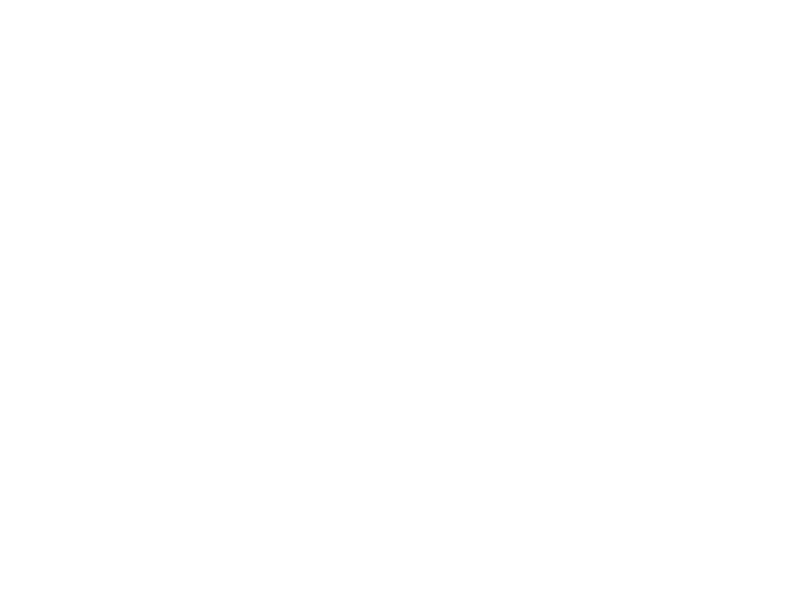

<IPython.core.display.Javascript object>


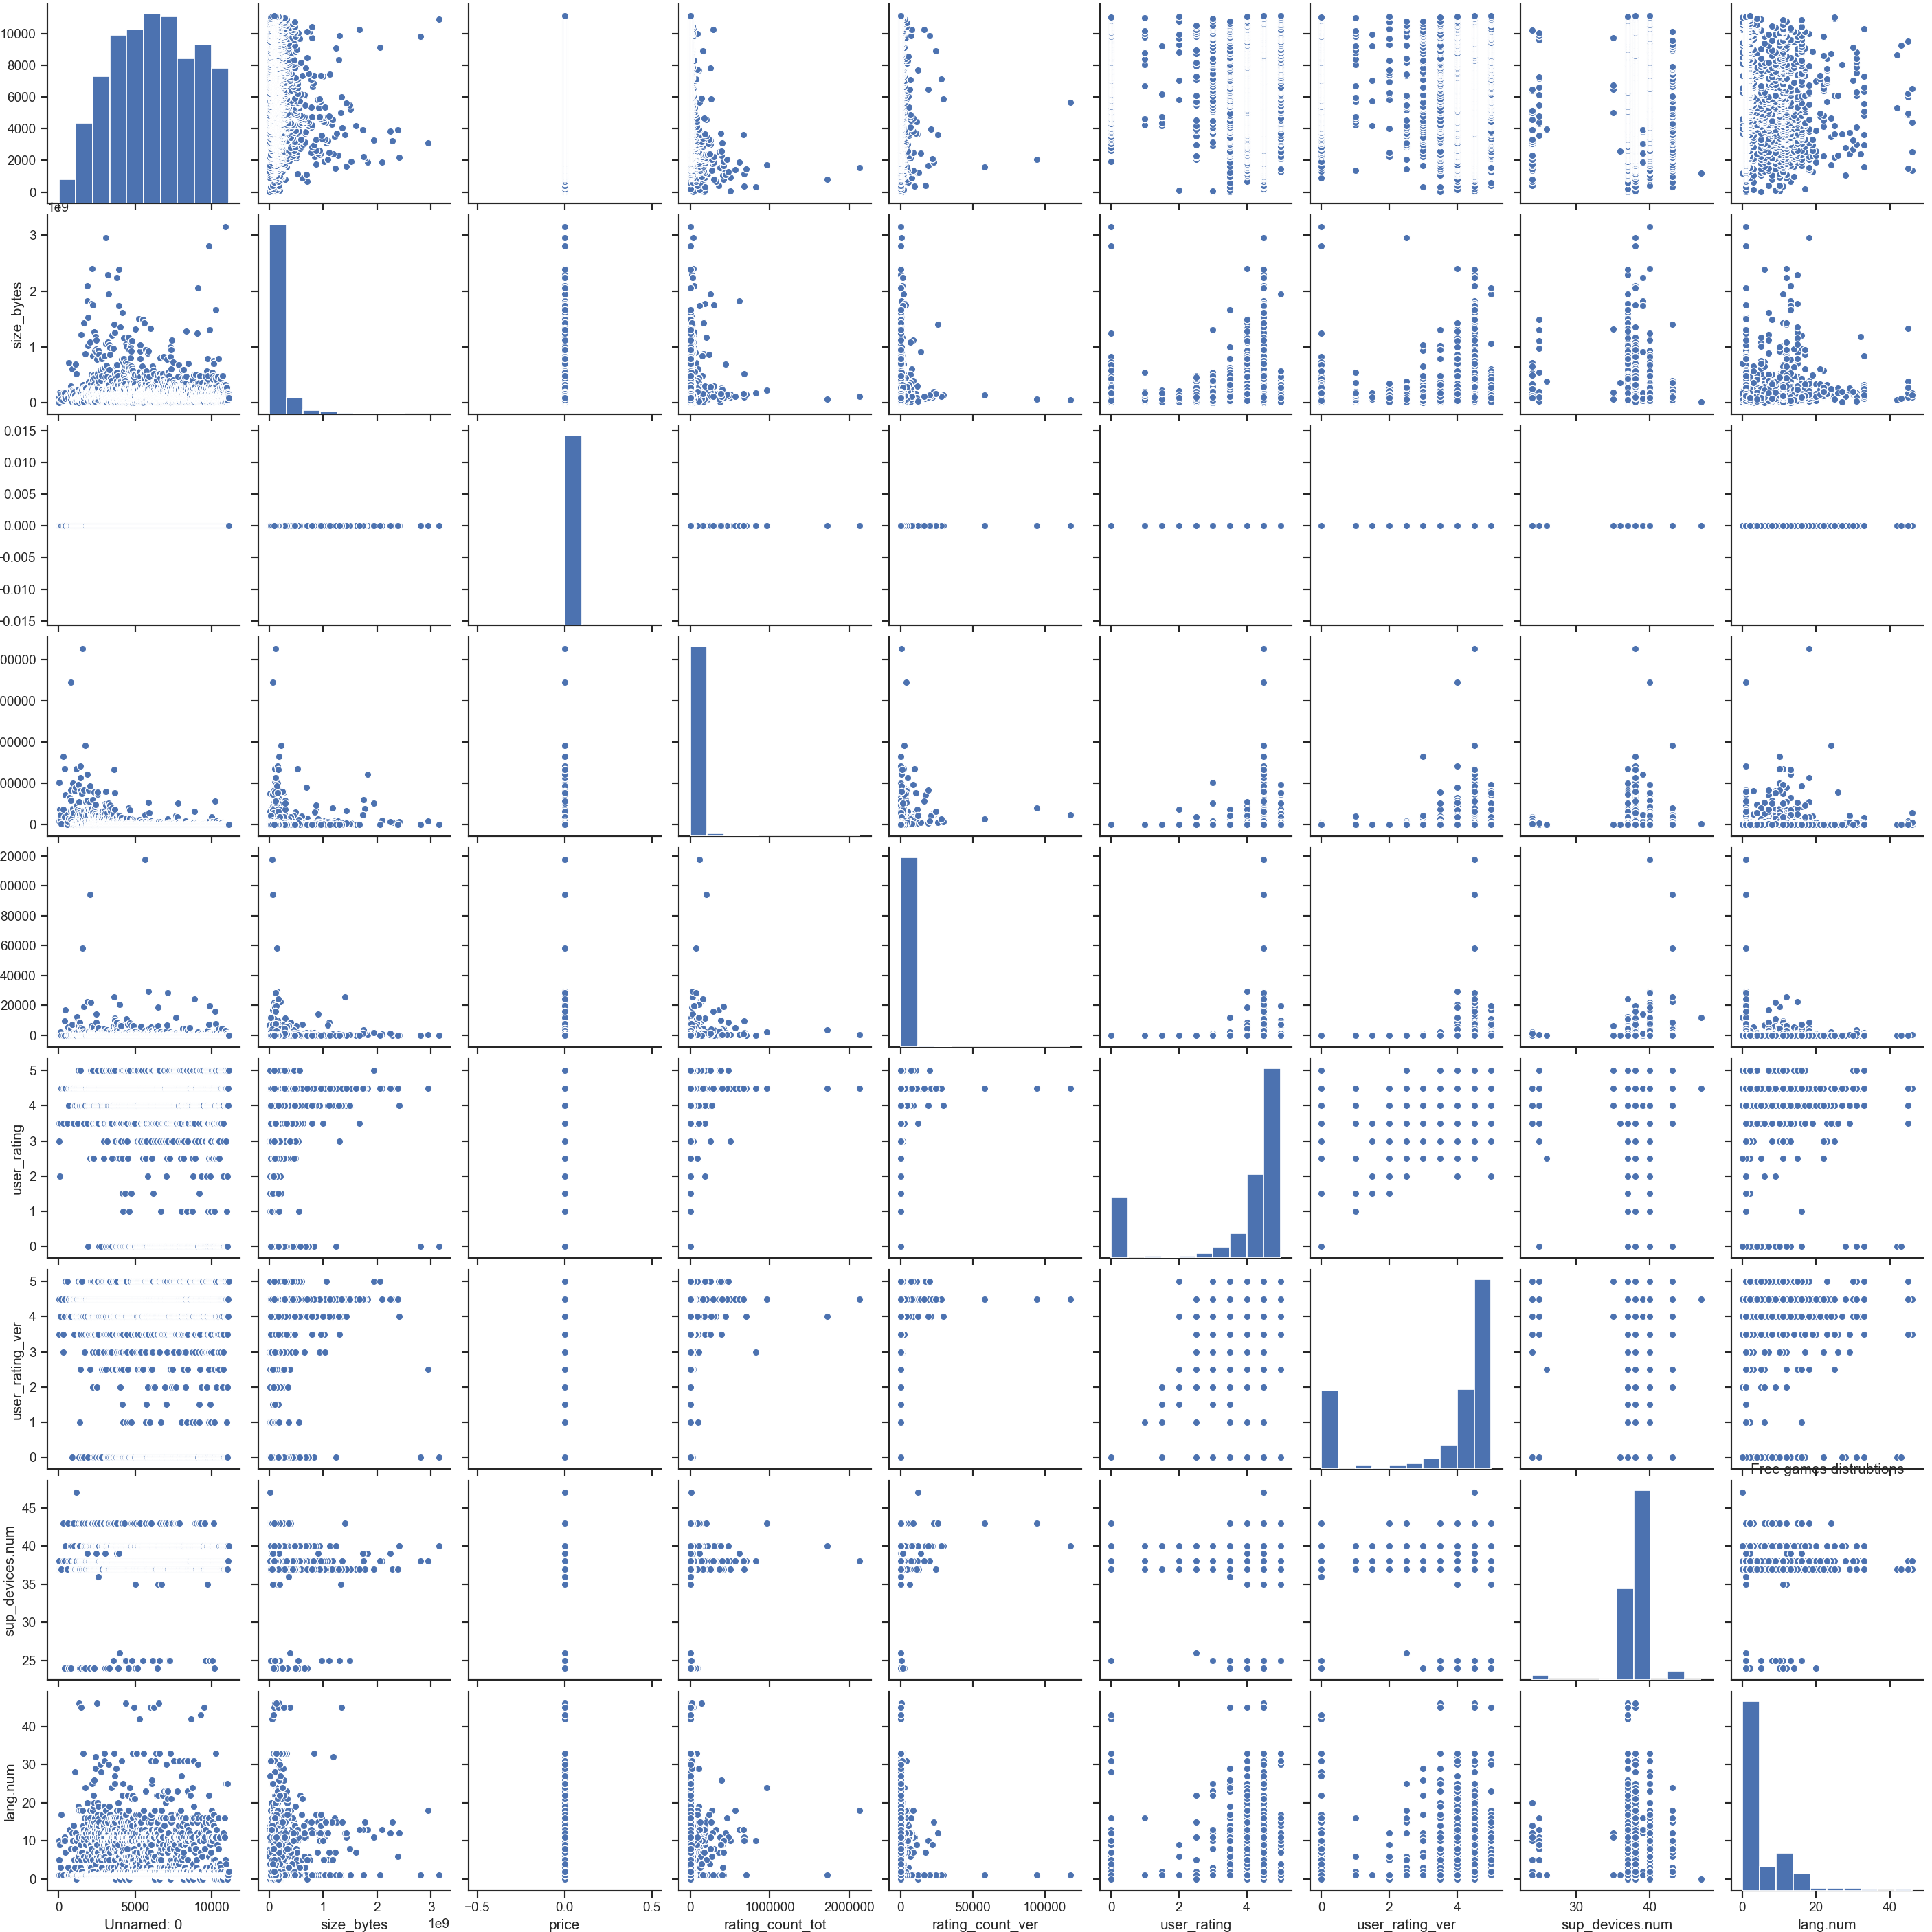

In [15]:
plt.figure()
sns.set(style="ticks", color_codes=True)
freegames=df[(df['prime_genre'] == 'Games') & (df['price'] == 0)]
g = sns.pairplot(data=freegames, dropna=True)
plt.title('Free games distrubtions')
plt.show()
plt.savefig('graphs/FREEGAMES.png')


<IPython.core.display.Javascript object>


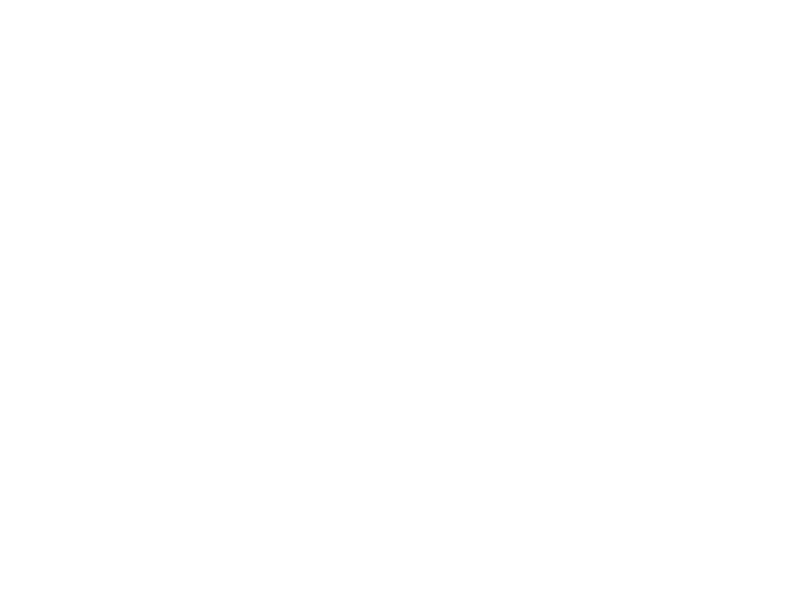

<IPython.core.display.Javascript object>


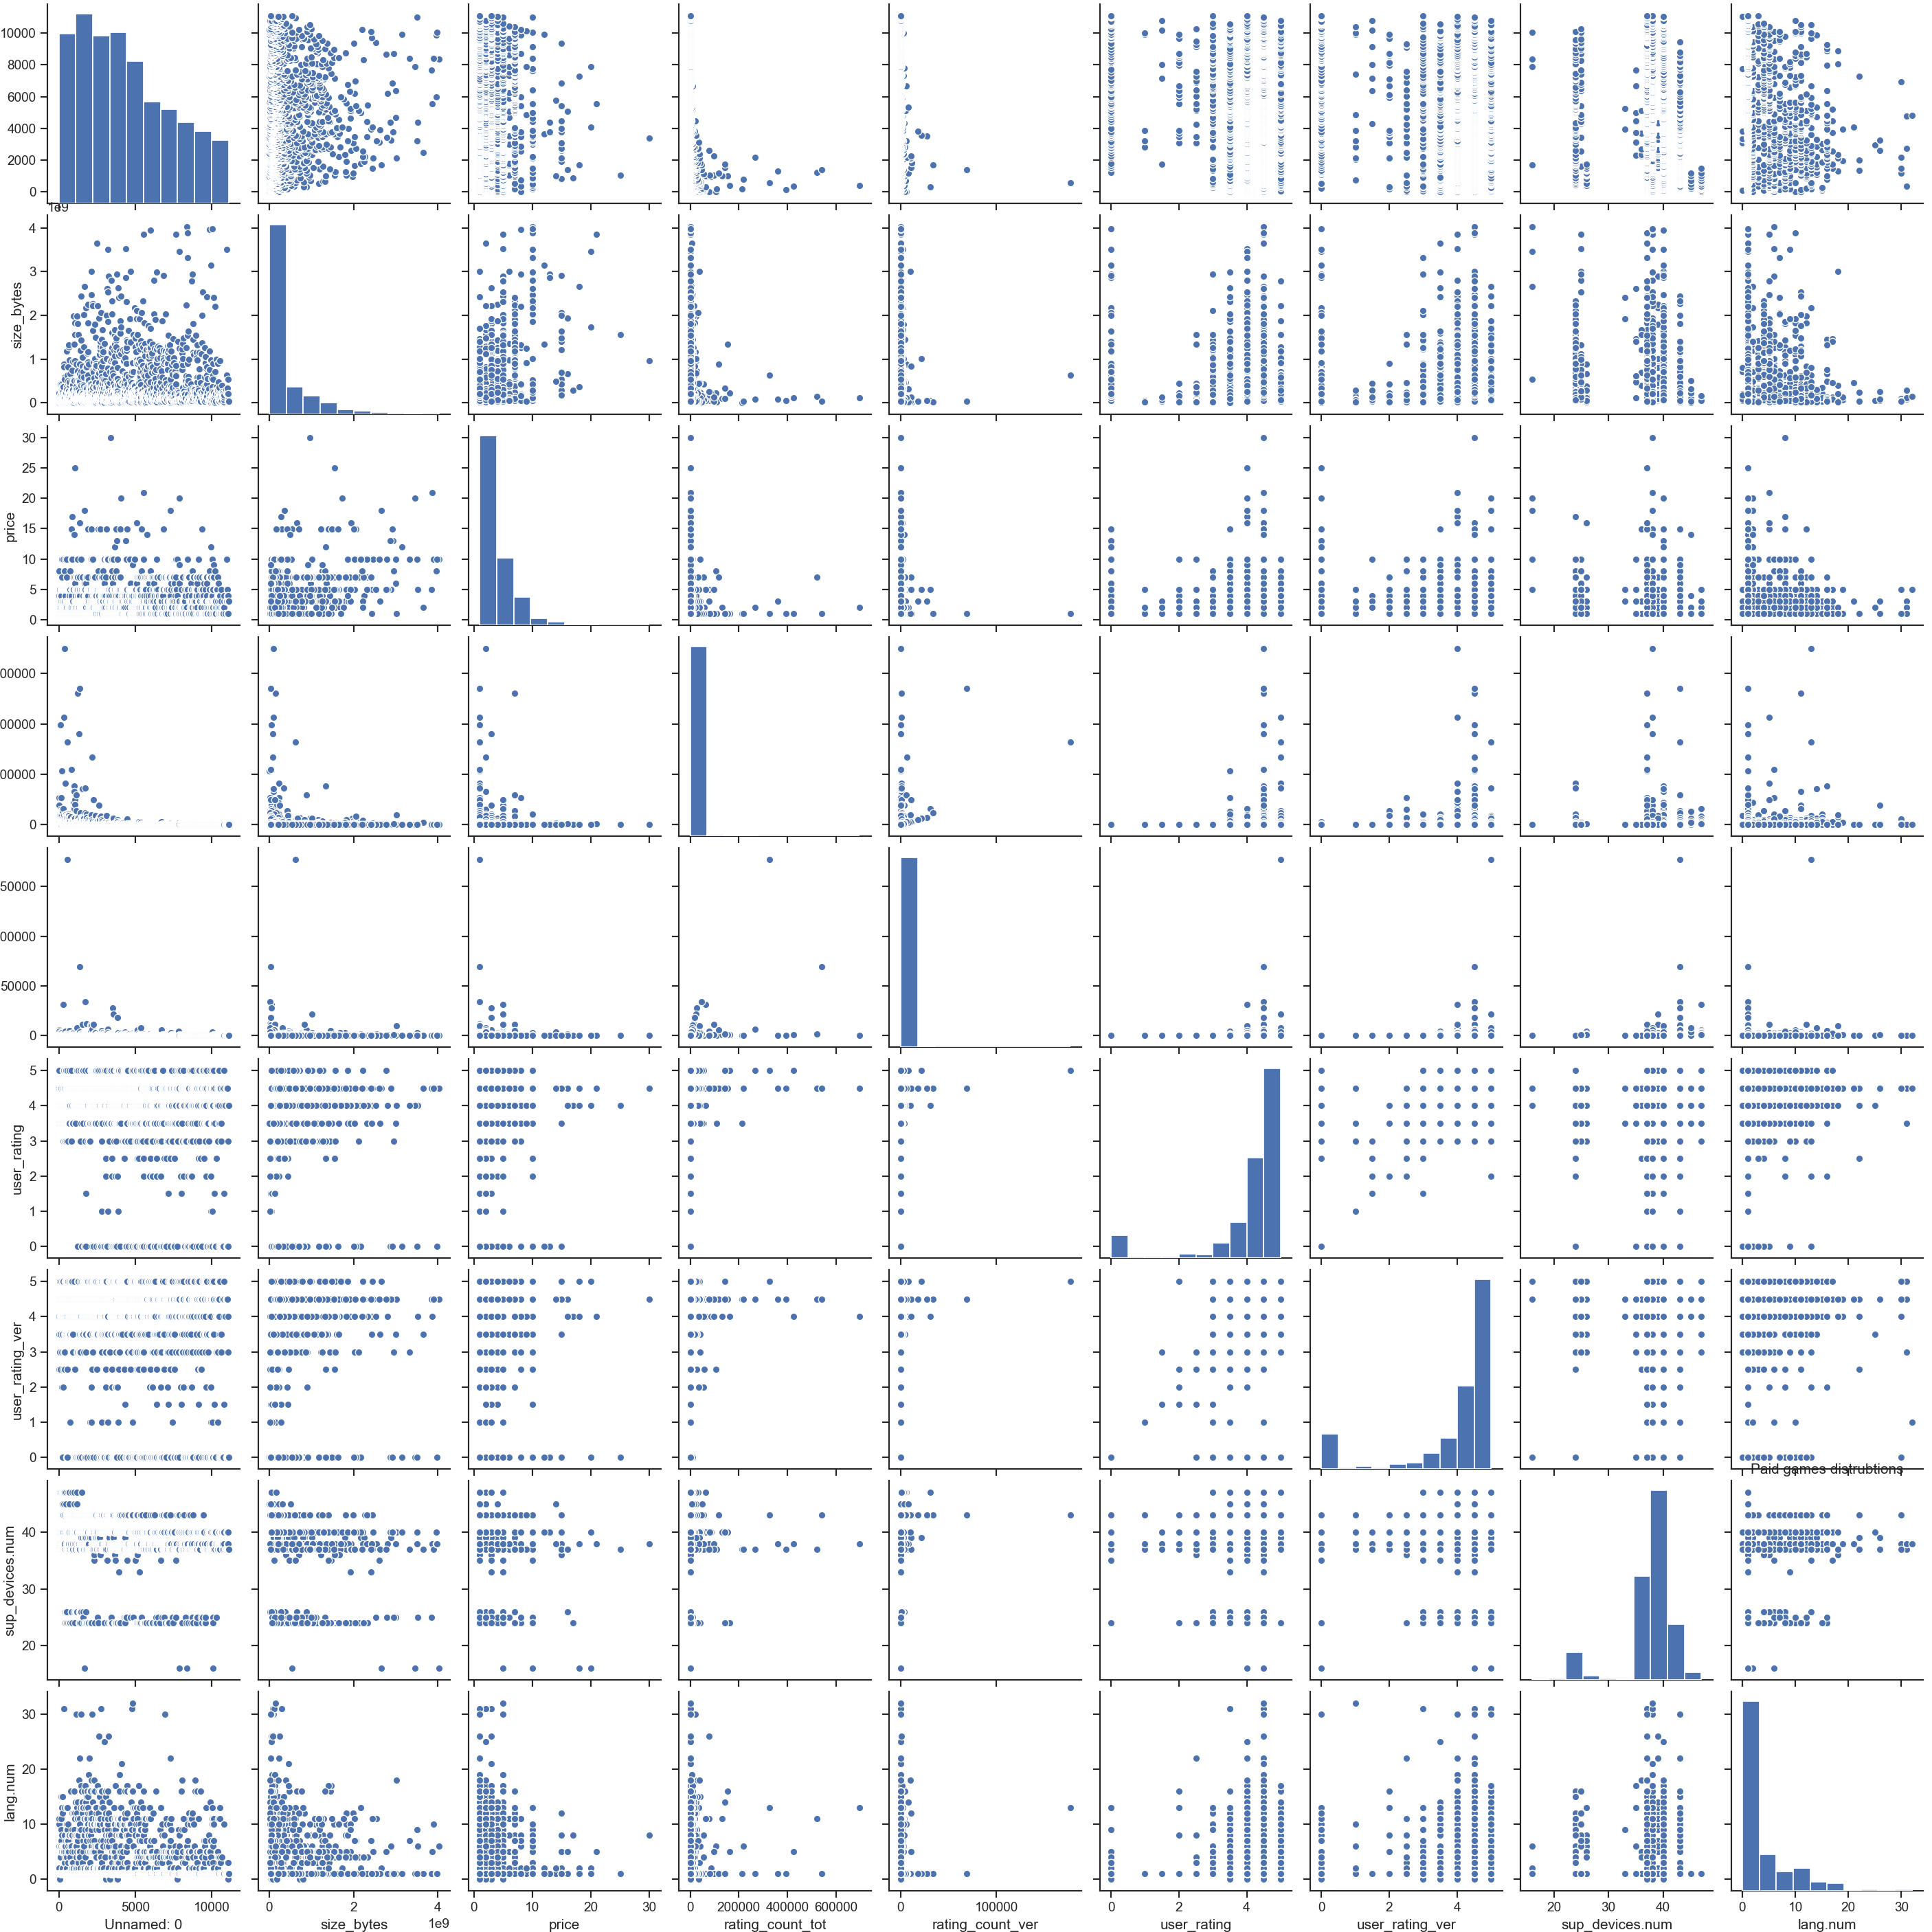

In [16]:
plt.figure()
nonefreegames=df[(df['prime_genre'] == 'Games') & (df['price'] > 0)]
nonefree = sns.pairplot(data=nonefreegames, dropna=True)
plt.title('Paid games distrubtions')
plt.show()
plt.savefig('graphs/paidgames.png')


<IPython.core.display.Javascript object>


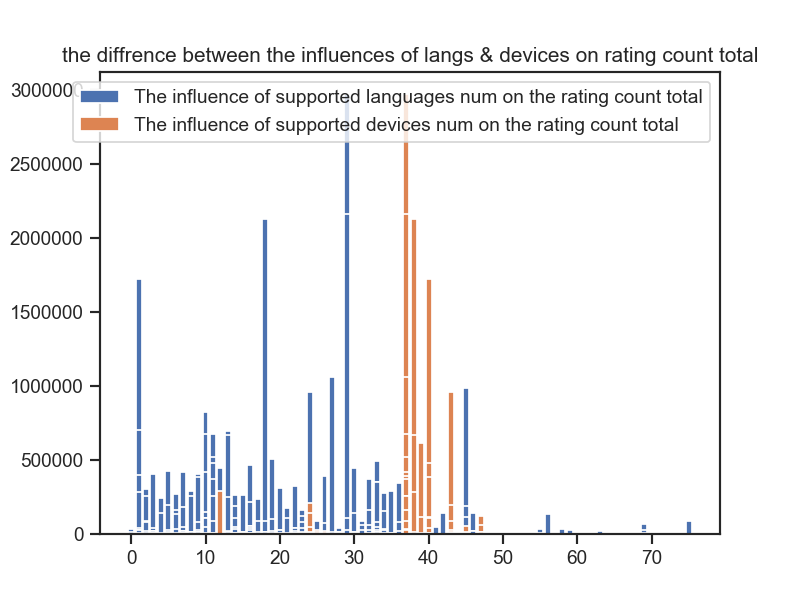

In [17]:
x = df['lang.num']

y = df['rating_count_tot']
x2 = df['sup_devices.num']

y2 = df['rating_count_tot']
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, y, label='The influence of supported languages num on the rating count total')
ax.bar(x2, y2, label='The influence of supported devices num on the rating count total')
plt.title('the diffrence between the influences of langs & devices on rating count total')
ax.legend()
plt.show()
plt.savefig('graphs/lang.num_sup-devices_rating.png')
